In [77]:
import pandas as pd
import os
import seaborn as sns
import plotly.express as px
import ast
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
df = pd.read_csv("../final_dataset.csv", encoding="ISO-8859-1")
df['zip_code'].unique()


array([90630, 90680, 90720, 92603, 92604, 92606, 92612, 92614, 92618,
       92625, 92626, 92627, 92660, 92662, 92683, 92701, 92703, 92704,
       92705, 92706, 92707, 92782, 92801, 92802, 92804, 92805, 92806,
       92831, 92832, 92833, 92840, 92841, 92866, 92868, 92869, 92870])

In [86]:
df.head()

,name,rating,price_level,types,business_status,user_ratings_total,zip_code,reviews,geoIdV4,population,...,hurricane_risk,tornado_risk,start_price,end_price,growth_rate,zhvi_mean,zhvi_median,zhvi_growth_pct,zhvi_std,zhvi_avg_annual_pct
0,Spectrum Store,3.2,NaN,"['point_of_interest', 'store', 'establishment']",OPERATIONAL,328.0,90630,"[""I stopped by this Spectrum store with my cou...",8535db23e2d4b6d2c435c347f373f23c,49932,...,9,97,241356.0587,1.062377e+06,340.169865,566729.2814,533751.1485,340.169865,200053.6689,13.606795
1,AT&T Store,4.2,NaN,"['store', 'point_of_interest', 'establishment']",OPERATIONAL,256.0,90630,['I had a great experience at this AT&T store!...,8535db23e2d4b6d2c435c347f373f23c,49932,...,9,97,241356.0587,1.062377e+06,340.169865,566729.2814,533751.1485,340.169865,200053.6689,13.606795
2,Staples,3.7,2.0,"['electronics_store', 'furniture_store', 'home...",OPERATIONAL,169.0,90630,['I had a large stack of confidential document...,8535db23e2d4b6d2c435c347f373f23c,49932,...,9,97,241356.0587,1.062377e+06,340.169865,566729.2814,533751.1485,340.169865,200053.6689,13.606795
3,Daiso - Japanese Household Goods,4.4,NaN,"['home_goods_store', 'store', 'point_of_intere...",OPERATIONAL,806.0,90680,['I\'ve been to other Daiso stores and this on...,0e61b2fbc91286e3b2021180c289c52c,26547,...,9,93,153350.6439,7.895721e+05,414.880224,406964.0666,378983.5320,414.880224,161871.2889,16.595209
4,Food 4 Less,4.1,1.0,"['grocery_or_supermarket', 'florist', 'liquor_...",OPERATIONAL,967.0,90680,"[""Food 4 Less is a well-stocked and budget-fri...",0e61b2fbc91286e3b2021180c289c52c,26547,...,9,93,153350.6439,7.895721e+05,414.880224,406964.0666,378983.5320,414.880224,161871.2889,16.595209


In [87]:
mean_ratings_by_zip = df.groupby('zip_code')['rating'].mean().reset_index()
mean_ratings_by_zip


,zip_code,rating
0,90630,3.700000
1,90680,4.333333
2,90720,4.700000
3,92603,3.600000
4,92604,4.000000
5,92606,4.100000
6,92612,4.200000
7,92614,4.100000
8,92618,4.350000
9,92625,4.216667


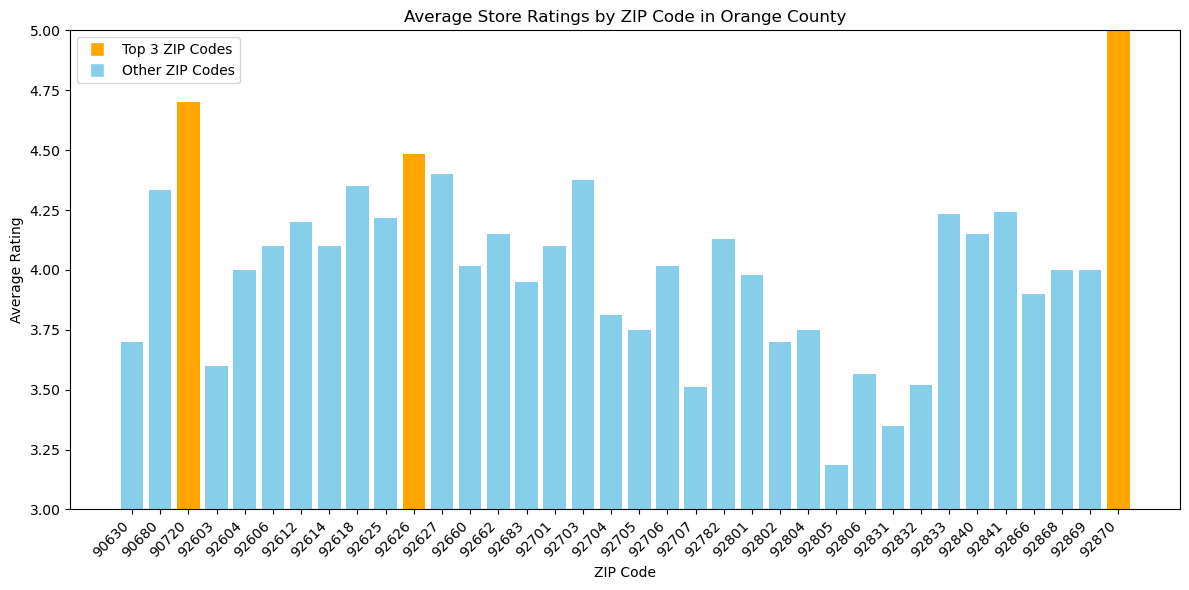

In [88]:
top3_zips = mean_ratings_by_zip.sort_values(by='rating', ascending=False).head(3)['zip_code'].values
colors = [
    'orange' if zip_code in top3_zips else 'skyblue'
    for zip_code in mean_ratings_by_zip['zip_code']
]


plt.figure(figsize=(12, 6))
plt.bar(mean_ratings_by_zip['zip_code'].astype(str), mean_ratings_by_zip['rating'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("ZIP Code")
plt.ylabel("Average Rating")
plt.title("Average Store Ratings by ZIP Code in Orange County")
plt.ylim(3, 5)
orange_patch = plt.Line2D([0], [0], marker='s', color='w', label='Top 3 ZIP Codes',
                          markerfacecolor='orange', markersize=10)
skyblue_patch = plt.Line2D([0], [0], marker='s', color='w', label='Other ZIP Codes',
                           markerfacecolor='skyblue', markersize=10)
plt.legend(handles=[orange_patch, skyblue_patch])

plt.tight_layout()
plt.show()
plt.show()


In [89]:
df

,name,rating,price_level,types,business_status,user_ratings_total,zip_code,reviews,geoIdV4,population,...,hurricane_risk,tornado_risk,start_price,end_price,growth_rate,zhvi_mean,zhvi_median,zhvi_growth_pct,zhvi_std,zhvi_avg_annual_pct
0,Spectrum Store,3.2,NaN,"['point_of_interest', 'store', 'establishment']",OPERATIONAL,328.0,90630,"[""I stopped by this Spectrum store with my cou...",8535db23e2d4b6d2c435c347f373f23c,49932,...,9,97,241356.0587,1.062377e+06,340.169865,566729.2814,533751.1485,340.169865,200053.6689,13.606795
1,AT&T Store,4.2,NaN,"['store', 'point_of_interest', 'establishment']",OPERATIONAL,256.0,90630,['I had a great experience at this AT&T store!...,8535db23e2d4b6d2c435c347f373f23c,49932,...,9,97,241356.0587,1.062377e+06,340.169865,566729.2814,533751.1485,340.169865,200053.6689,13.606795
2,Staples,3.7,2.0,"['electronics_store', 'furniture_store', 'home...",OPERATIONAL,169.0,90630,['I had a large stack of confidential document...,8535db23e2d4b6d2c435c347f373f23c,49932,...,9,97,241356.0587,1.062377e+06,340.169865,566729.2814,533751.1485,340.169865,200053.6689,13.606795
3,Daiso - Japanese Household Goods,4.4,NaN,"['home_goods_store', 'store', 'point_of_intere...",OPERATIONAL,806.0,90680,['I\'ve been to other Daiso stores and this on...,0e61b2fbc91286e3b2021180c289c52c,26547,...,9,93,153350.6439,7.895721e+05,414.880224,406964.0666,378983.5320,414.880224,161871.2889,16.595209
4,Food 4 Less,4.1,1.0,"['grocery_or_supermarket', 'florist', 'liquor_...",OPERATIONAL,967.0,90680,"[""Food 4 Less is a well-stocked and budget-fri...",0e61b2fbc91286e3b2021180c289c52c,26547,...,9,93,153350.6439,7.895721e+05,414.880224,406964.0666,378983.5320,414.880224,161871.2889,16.595209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Movado Company Store,4.4,NaN,"['store', 'point_of_interest', 'establishment']",OPERATIONAL,13.0,92868,['Jessie provided exceptional customer service...,d1e2d52b6b69272b9459aead81c1bf97,27730,...,12,89,162761.1858,9.056865e+05,456.451179,452491.9178,423650.6116,456.451179,191541.8611,18.258047
220,The Cosmetics Company Store,4.1,NaN,"['store', 'point_of_interest', 'establishment']",OPERATIONAL,20.0,92868,['I had a fantastic experience shopping at the...,d1e2d52b6b69272b9459aead81c1bf97,27730,...,12,89,162761.1858,9.056865e+05,456.451179,452491.9178,423650.6116,456.451179,191541.8611,18.258047
221,The UPS Store,4.0,NaN,"['store', 'finance', 'point_of_interest', 'est...",OPERATIONAL,70.0,92869,['I frequently visit the location at 3419 E Ch...,ae066d9c66da3ef9fd5232281021211c,35064,...,12,66,254128.1342,1.201587e+06,372.827395,607478.2139,578198.9304,372.827395,223497.5208,14.913096
222,Target,4.0,2.0,"['department_store', 'shoe_store', 'clothing_s...",OPERATIONAL,230.0,92869,"[""That Target store should close permanently. ...",ae066d9c66da3ef9fd5232281021211c,35064,...,12,66,254128.1342,1.201587e+06,372.827395,607478.2139,578198.9304,372.827395,223497.5208,14.913096


# Competitor

In [125]:
df['types'] = df['types'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


df['primary_category'] = df['types'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None
)
df.dtypes

name                      object
rating                   float64
price_level              float64
types                     object
business_status           object
user_ratings_total       float64
zip_code                   int64
reviews                   object
geoIdV4                   object
population                 int64
median_age               float64
avg_income                 int64
white_collar_pct         float64
edu_bachelor_plus_pct    float64
crime_index                int64
robbery_index              int64
assault_index              int64
avg_temp                 float64
sunshine_pct               int64
annual_rainfall_in       float64
earthquake_risk            int64
hurricane_risk             int64
tornado_risk               int64
start_price              float64
end_price                float64
growth_rate              float64
zhvi_mean                float64
zhvi_median              float64
zhvi_growth_pct          float64
zhvi_std                 float64
zhvi_avg_a

In [91]:
# this function is for the bar graphs which is not being used rihght now
def plot_competitor_distribution(df, category):
    """
    Plots the number of competitors per ZIP code for the given primary category.
    """
    filtered = df[df['primary_category'] == category]
    
    competitor_counts = filtered.groupby('zip_code').size().reset_index(name='competitor_count')
    
    competitor_counts = competitor_counts.sort_values(by='competitor_count', ascending=False)

    # Plot
    competitor_matrix = df.groupby(['zip_code', 'primary_category']) \
                      .size().reset_index(name='count')

# Plot
    plt.figure(figsize=(14, 6))
    sns.barplot(data=competitor_matrix, x='zip_code', y='count', hue='primary_category')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("ZIP Code")
    plt.ylabel("Competitor Count")
    plt.title("Competitor Distribution by ZIP and Primary Category")
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

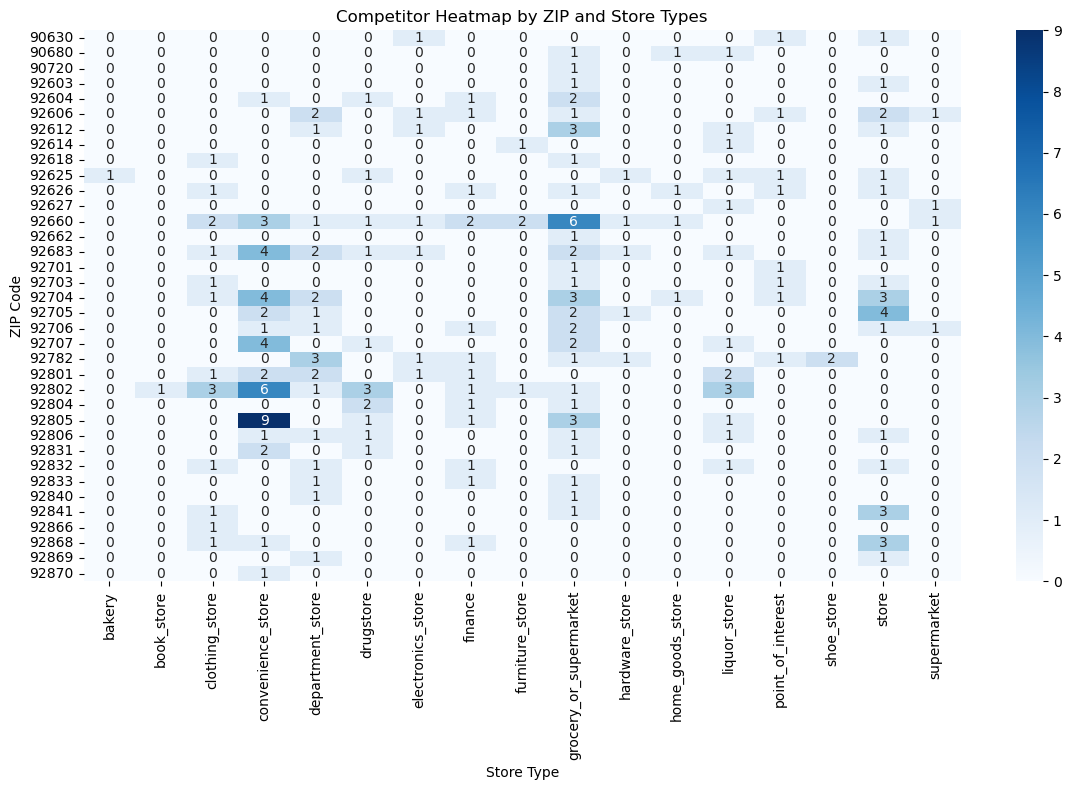

In [92]:
# Plot
pivot = df.groupby(['zip_code', 'primary_category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title("Competitor Heatmap by ZIP and Store Types")
plt.xlabel("Store Type")
plt.ylabel("ZIP Code")
plt.tight_layout()
plt.show()

# Total reviews

In [93]:
mean_user_ratins_total = df.groupby('zip_code')['user_ratings_total'].mean().reset_index()
mean_user_ratins_total

,zip_code,user_ratings_total
0,90630,251.000000
1,90680,624.000000
2,90720,384.000000
3,92603,362.500000
4,92604,264.000000
5,92606,343.333333
6,92612,445.285714
7,92614,158.000000
8,92618,607.500000
9,92625,113.333333


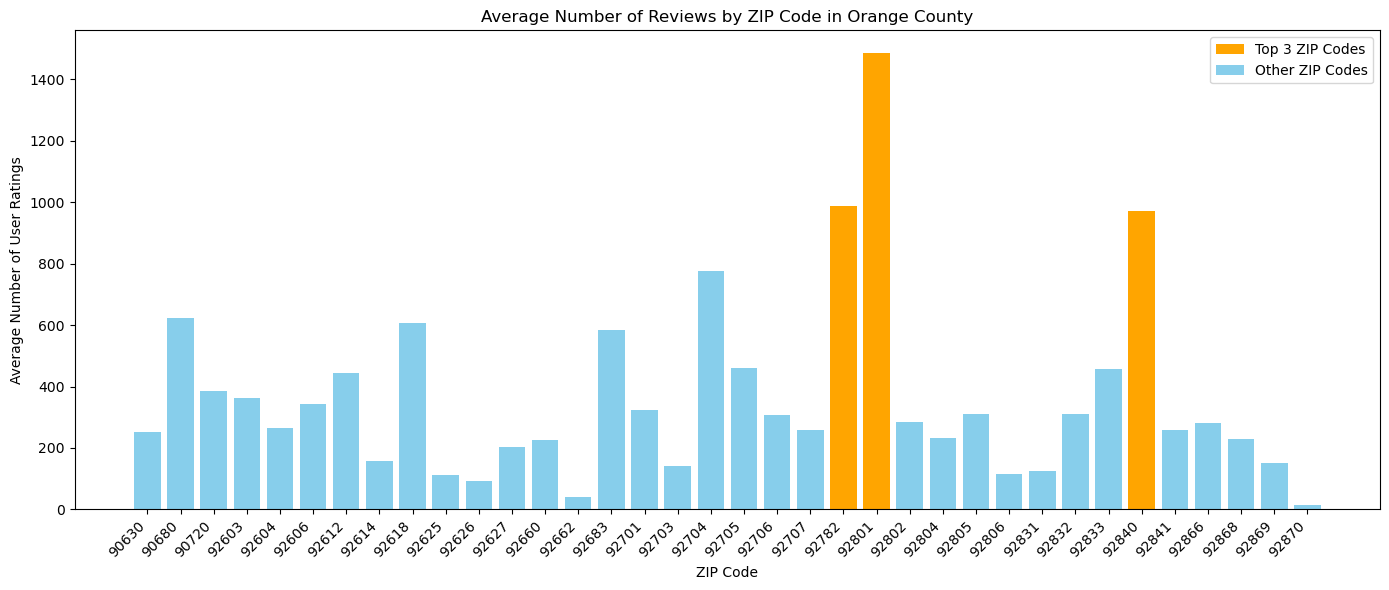

In [94]:
top3_zip_reviews = mean_user_ratins_total.sort_values(by='user_ratings_total', ascending=False).head(3)['zip_code'].values

colors = [
    'orange' if zip_code in top3_zip_reviews else 'skyblue'
    for zip_code in mean_user_ratins_total['zip_code']
]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(mean_user_ratins_total['zip_code'].astype(str), 
        mean_user_ratins_total['user_ratings_total'], 
        color=colors)

plt.xticks(rotation=45, ha='right')
plt.xlabel("ZIP Code")
plt.ylabel("Average Number of User Ratings")
plt.title("Average Number of Reviews by ZIP Code in Orange County")

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='orange', label='Top 3 ZIP Codes'),
    Patch(facecolor='skyblue', label='Other ZIP Codes')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

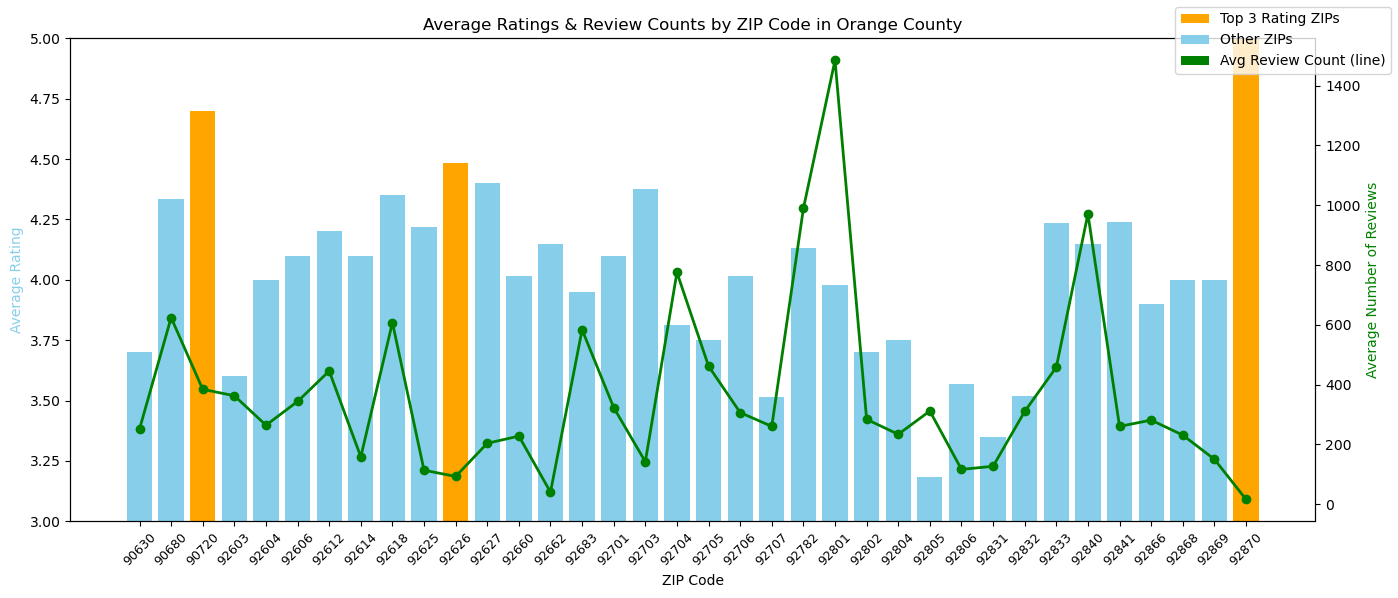

In [95]:

from matplotlib.patches import Patch

# Merge both datasets
combined_df = mean_ratings_by_zip.merge(mean_user_ratins_total, on='zip_code')

# Sort by ZIP
combined_df = combined_df.sort_values(by='zip_code')

# Define top ZIPs for ratings and reviews (for highlighting)
top3_rating_zips = combined_df.sort_values(by='rating', ascending=False).head(3)['zip_code'].values
top3_review_zips = combined_df.sort_values(by='user_ratings_total', ascending=False).head(3)['zip_code'].values

# Bar colors for ratings
bar_colors = ['orange' if zip_code in top3_rating_zips else 'skyblue' for zip_code in combined_df['zip_code']]

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar: Average Ratings
bars = ax1.bar(combined_df['zip_code'].astype(str), combined_df['rating'], color=bar_colors)
ax1.set_ylabel('Average Rating', color='skyblue')
ax1.set_ylim(3, 5)

# Line: Average Reviews
ax2 = ax1.twinx()
ax2.plot(combined_df['zip_code'].astype(str), 
         combined_df['user_ratings_total'], 
         color='green', marker='o', linewidth=2, label='Avg # of Reviews')
ax2.set_ylabel('Average Number of Reviews', color='green')

# Labels & title
ax1.set_xlabel("ZIP Code")
plt.title("Average Ratings & Review Counts by ZIP Code in Orange County")
ax1.tick_params(axis='x', rotation=45, labelsize=9)

# Legend
legend_elements = [
    Patch(facecolor='orange', label='Top 3 Rating ZIPs'),
    Patch(facecolor='skyblue', label='Other ZIPs'),
    Patch(facecolor='green', label='Avg Review Count (line)')
]
fig.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


In [101]:
df_score = df.copy()  # Or use your current working DataFrame if it's already clean

# Step 2: Normalize rating, reviews, competitor count, zhvi metrics
scaler = MinMaxScaler()

df_score[['norm_rating', 'norm_reviews']] = scaler.fit_transform(
    df_score[['rating', 'user_ratings_total']]
)
competitor_counts = df.groupby('zip_code').size().reset_index(name='competitor_count')
df_score = df_score.merge(competitor_counts, on='zip_code', how='left')

df_score['norm_competitors'] = 1 - scaler.fit_transform(
    df_score[['competitor_count']]
)

df_score[['norm_zhvi_growth', 'norm_zhvi_mean']] = scaler.fit_transform(
    df_score[['zhvi_avg_annual_pct', 'zhvi_mean']]
)

# Step 3: Compute Opportunity Score
df_score['opportunity_score'] = (
    df_score['norm_rating'] * 0.4 +
    df_score['norm_reviews'] * 0.2 +
    df_score['norm_competitors'] * 0.2 +
    df_score['norm_zhvi_growth'] * 0.1 +
    df_score['norm_zhvi_mean'] * 0.1
)
# print(top_zip_scores[['zip_code', 'rating', 'user_ratings_total','competitor_count', 'score']].head(10))

In [119]:
print(df.columns)

Index(['name', 'rating', 'price_level', 'types', 'business_status',
       'user_ratings_total', 'zip_code', 'reviews', 'geoIdV4', 'population',
       'median_age', 'avg_income', 'white_collar_pct', 'edu_bachelor_plus_pct',
       'crime_index', 'robbery_index', 'assault_index', 'avg_temp',
       'sunshine_pct', 'annual_rainfall_in', 'earthquake_risk',
       'hurricane_risk', 'tornado_risk', 'start_price', 'end_price',
       'growth_rate', 'zhvi_mean', 'zhvi_median', 'zhvi_growth_pct',
       'zhvi_std', 'zhvi_avg_annual_pct', 'primary_category'],
      dtype='object')


/var/folders/1r/srs2vcc147l1z08hd_ybbdnm0000gn/T/ipykernel_25203/486576506.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/1r/srs2vcc147l1z08hd_ybbdnm0000gn/T/ipykernel_25203/486576506.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




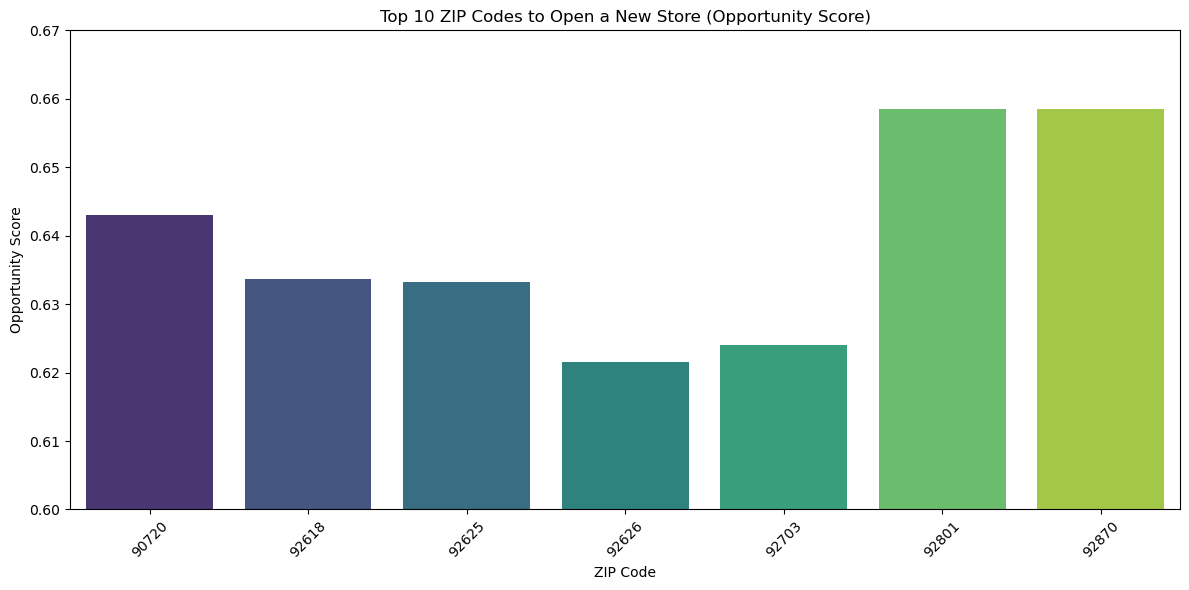

In [121]:
plt.figure(figsize=(12, 6))
top_zip_scores = df_score.sort_values(by='opportunity_score', ascending=False).head(10)

sns.barplot(data=top_zip_scores, x='zip_code', y='opportunity_score', palette='viridis', ci=None)

plt.title("Top 10 ZIP Codes to Open a New Store (Opportunity Score)")
plt.xlabel("ZIP Code")
plt.ylabel("Opportunity Score")
plt.ylim(0.60, 0.67)  # <-- Narrowed range to exaggerate differences
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
